In [1]:
# import dependencies
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict

In [2]:
# import data processing functions
from datafuncs import *

# Analysis of behavior across multiple mice

## Plot of mean eyeblink responses from each mouse on one day during training

In [3]:
# Get files
date = '2025-05-17'  # Set date
mouse_ids = ["6599TR", "8689S", "8689J"]  # List of mouse ID's
fec_folder_path = f"../../Data/fec/"  # Path to FEC data
stim_folder_path = f"../../Data/stim/"  # Path to stimulus data

Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.


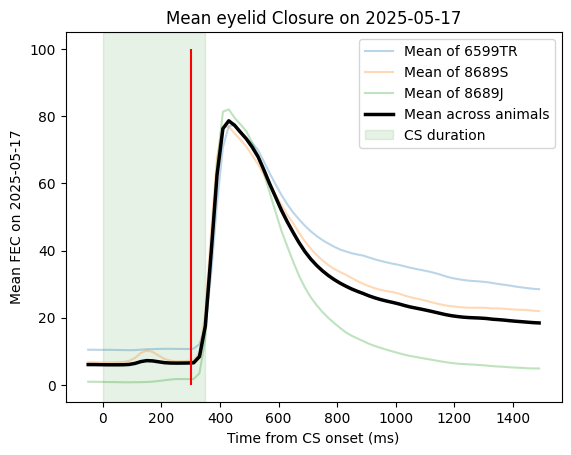

In [4]:
# Save mean curves for each mouse

# Define common x-axis (smooth and finely spaced)
x_common = np.arange(-50, 1500, 20)

# Numpy array to store each mean curve
curves = np.zeros((len(mouse_ids), len(x_common)))

# Loop through each mouse
for i, mouse_id in enumerate(mouse_ids):
    
    # Get list of FEC and stimulus files
    fec_files = sorted(glob.glob(fec_folder_path + f"{mouse_id}/training/*.csv"))
    stim_files = sorted(glob.glob(stim_folder_path + f"{mouse_id}/training/*.csv"))

    # Interpolate x values to plot mean FEC across trials in one experiment

    # Group files by date
    files_by_date = group_by_date(fec_files, stim_files)

    # Extract data from selected date
    dfs = process_date_files(files_by_date, date)
    if dfs is None:
        print(f"No data from {date}")
    else:
        df_fec, df_stim = dfs  # Save FEC and stim data as dataframes

        num_trials = len(df_stim)  # save number of trials
        df_fec["FEC"] = normalize_fec(df_fec["FEC"])  # Normalize FEC values
        merged_df = merge_dataframes(df_fec, df_stim)  # Merge the dataframes based on the 'Trial #' column

        # Calculate mean across trials
        y_mean, _ = interpolated_curve(files_by_date, date, x_common)
        
        # Save individual mean curves
        curves[i, :] = y_mean
    
if np.count_nonzero(curves) == 0:
    pass
else:
    # Plot faded individual mean curves
    indiv_means = plt.plot(x_common, curves.T, alpha=0.3)
    # Give each curve a label
    for i, curve in enumerate(indiv_means):
        curve.set_label(f"Mean of {mouse_ids[i]}")
    
    day_mean = np.mean(curves, axis=0)
    
    # Plot dark average line
    plt.plot(x_common, day_mean, color='k', linewidth=2.5, label='Mean across animals')

    # Green shading shows CS duration
    plt.axvspan(0, 350, color='g', alpha=0.1, label="CS duration")
    # Red line shows US onset (ends at same time as CS)
    plt.vlines(x=300, ymin=0, ymax=100, color="r")

    # Add labels, legend, etc.
    plt.xlabel("Time from CS onset (ms)")
    plt.ylabel(f"Mean FEC on {date}")
    plt.title(f"Mean eyelid Closure on {date}")
    plt.legend()
    # plt.tight_layout()
    plt.show()

## Plot of mean eyeblink responses across mice for multiple training days

In [5]:
# List of mouse ID's
mouse_ids = ["6599TR", "8689S", "8689J"]

# Define common x-axis (smooth and finely spaced)
x_common = np.arange(-50, 1500, 20)

# Group files by date
files_by_date = group_by_date(fec_files, stim_files)
dates = ["2025-05-10", "2025-05-13", "2025-05-14", "2025-05-17", "2025-05-18"]  # Define list of dates

# Save list of curves
curves = np.zeros((len(dates), len(x_common)))  # One curve for each date

# Populate curves with means from each day
for i, date in enumerate(dates):
    indiv_means = np.zeros((len(mouse_ids), len(x_common)))
    
    for j, mouse_id in enumerate(mouse_ids):
        # Get list of FEC and stimulus files
        fec_files = sorted(glob.glob(fec_folder_path + f"{mouse_id}/training/*.csv"))
        stim_files = sorted(glob.glob(stim_folder_path + f"{mouse_id}/training/*.csv"))

        # Group files by date
        files_by_date = group_by_date(fec_files, stim_files)
        
        # Caluclate mean curve
        interp = interpolated_curve(files_by_date, date, x_common)
        if interp is not None:
            y_mean, _ = interp
            indiv_means[j, :] = y_mean
    
    curves[i, :] = np.mean(indiv_means, axis=0)

Processing 2025-05-10 with 1 FEC files and 1 stimulus files.
Processing 2025-05-10 with 0 FEC files and 0 stimulus files.
Processing 2025-05-10 with 1 FEC files and 1 stimulus files.
Processing 2025-05-13 with 1 FEC files and 1 stimulus files.
Processing 2025-05-13 with 1 FEC files and 1 stimulus files.
Processing 2025-05-13 with 1 FEC files and 1 stimulus files.
Processing 2025-05-14 with 1 FEC files and 1 stimulus files.
Processing 2025-05-14 with 1 FEC files and 1 stimulus files.
Processing 2025-05-14 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-17 with 1 FEC files and 1 stimulus files.
Processing 2025-05-18 with 1 FEC files and 1 stimulus files.
Processing 2025-05-18 with 1 FEC files and 1 stimulus files.
Processing 2025-05-18 with 1 FEC files and 1 stimulus files.


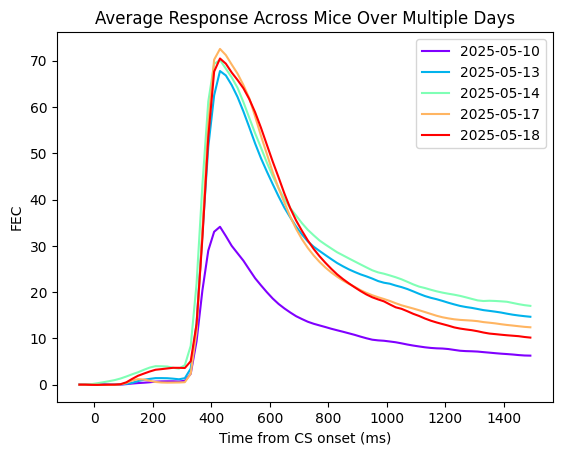

In [ ]:
## Create plot
# plt.figure(figsize=(8,6))

# Get reversed rainbow colormap with 14 evenly spaced colors
cmap = plt.cm.rainbow_r
colors = [cmap(i / (len(curves) - 1)) for i in range(len(curves)-1, -1, -1)]

# Plot curves
temp = curves[:, :]
for i, y_mean in enumerate(curves):
    temp[i, :] -= y_mean[0]
lines = plt.plot(x_common, temp.T, color=None)

# Manually assign colors to curves
for line, c in zip(lines, colors):
    line.set_color(c)

for i, line in enumerate(lines):
    line.set_label(dates[i])

# # Green shading shows CS duration
# plt.axvspan(0, 350, color='g', alpha=0.1, label="CS duration")
# # Red line shows US onset (ends at same time as CS)
# plt.vlines(x=300, ymin=0, ymax=100, color="r")

# Add labels, legend, etc.
plt.xlabel("Time from CS onset (ms)")
plt.ylabel("FEC")
plt.title("Mean Response Across Mice Over Multiple Days")
plt.legend()
plt.show()

In [ ]:
print(sorted(["2025-05-02", "2025-05-01"]))

['2025-05-01', '2025-05-02']
